In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns = [data.feature_names])
y = pd.Series(data.target)
x.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts()

1    357
0    212
dtype: int64

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
model = LogisticRegression(C=95, penalty='l1', solver='liblinear')

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(C=95, penalty='l1', solver='liblinear')

In [ ]:
accuracy = model.score(x_test, y_test)

In [ ]:
accuracy

0.9590643274853801

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict[1:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
y_test[1:10]

457    1
202    0
388    1
112    1
90     1
480    1
462    1
153    1
85     0
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
c_matrix = confusion_matrix(y_test, predict)

In [ ]:
c_matrix

array([[ 45,   4],
       [  3, 119]])

In [ ]:
prob = model.predict_proba(x_test)

In [ ]:
prob

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
prob2 = prob[:,1]
FPR, TPR, th = roc_curve(y_test, prob2)

0.9928069588491134

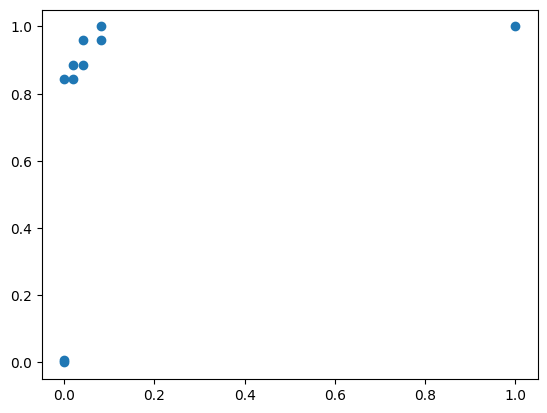

In [ ]:
plt.scatter(FPR,TPR)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, prob2)
auc